# Задание 2. Логические методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для алгоритма "Решающее дерево" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: критерий информативности (criterion), глубина дерева (max_depth).
5. Для алгоритма "Случайный лес" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: количество деревьев (n_estimators), количество признаков для разделения (max_features). Использовать параметры criterion и max_depth, отобранные для алгоритма "Решающее дерево".
6. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Логические методы](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9B.D0.BE.D0.B3.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B5_.D0.BC.D0.B5.D1.82.D0.BE.D0.B4.D1.8B_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.86.D0.B8.D0.B8).

## Выполнил студент

ФИО Давыдов Алексей Михайлович

Группа Б9119-02.03.03техпро

## Выборка данных < Milk Quality Prediction >

* Ссылка на выборку: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
* Описание выборки: Оценка качества молока. Этот набор данных состоит из 7 независимых переменных, т. е. pH, температуры, вкуса, запаха, жира, мутности и цвета. Обычно от этих параметров зависит сорт или качество молока. Эти параметры играют жизненно важную роль в прогнозном анализе молока.
* Количество классов: 3
* Количество признаков: 7
* Типы признаков: ...
* Количество объектов: 1059

## Библиотеки

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import itertools
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from matplotlib.image import imread
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits import mplot3d
from scipy.spatial.distance import cdist
from scipy.special import softmax
from sklearn import tree
from sklearn.datasets import load_boston, load_wine, make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, ParameterGrid, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

## Подключение

In [3]:
data = pd.read_csv("ОценкаЭффективностиСДП/accuracy_estimate_sdp/milknew.csv")
data["Grade"] = data["Grade"].map({"high": 3, "medium": 2, "low": 1})
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,3
1,6.6,36,0,1,0,1,253,3
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,3
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,3


In [4]:
X = data[data.columns[:-1]]
Y = data["Grade"]

In [5]:
# Разделение выборки на обучение и контроль
random_samples = []

for random_state in range(0, 60, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=random_state
    )
    random_samples.append(
        {
            "random_state": random_state,
            "X_train": X_train,
            "X_test": X_test,
            "Y_train": Y_train,
            "Y_test": Y_test,
        }
    )

## Алгоритм "Решающее дерево" (DecisionTree)

In [6]:
# Применение алгоритма классификации

random_models = []

for random_sample in random_samples:

    X_train = random_sample["X_train"]
    Y_train = random_sample["Y_train"]

    X_test = random_sample["X_test"]
    Y_test = random_sample["Y_test"]

    random_state = random_sample["random_state"]

    # Критерии информативности: энтропийный (entroy) и Джини (gini)
    model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=10)
    model.fit(X_train, Y_train)
    random_models.append(model)

    print("-" * 10)
    print("random_state: ", random_state)

    print("Train: ", model.score(X_train, Y_train))
    print("Test : ", model.score(X_test, Y_test))
    print(classification_report(Y_test, model.predict(X_test)))

----------
random_state:  0
Train:  0.8713105076741441
Test :  0.8160377358490566
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        69
           2       0.95      0.53      0.68        77
           3       0.64      0.98      0.77        66

    accuracy                           0.82       212
   macro avg       0.86      0.83      0.81       212
weighted avg       0.87      0.82      0.81       212

----------
random_state:  10
Train:  0.8583234946871311
Test :  0.8679245283018868
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        81
           2       0.96      0.65      0.78        72
           3       0.69      0.98      0.81        59

    accuracy                           0.87       212
   macro avg       0.88      0.87      0.86       212
weighted avg       0.90      0.87      0.87       212

----------
random_state:  20
Train:  0.8949232585596222
Test :  0.8537735

In [7]:
# Текстовое представление дерева

for i, random_model in enumerate(random_models):
    text_representation = tree.export_text(random_model)

    print(
        "-" * 5 + "\n" + "random_state:" + str(random_samples[i]["random_state"]) + "\n"
    )
    print(text_representation)

-----
random_state:0

|--- feature_0 <= 7.10
|   |--- feature_0 <= 6.05
|   |   |--- class: 1
|   |--- feature_0 >  6.05
|   |   |--- feature_1 <= 47.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 3
|   |   |--- feature_1 >  47.50
|   |   |   |--- class: 1
|--- feature_0 >  7.10
|   |--- class: 1

-----
random_state:10

|--- feature_0 <= 7.10
|   |--- feature_0 <= 6.00
|   |   |--- class: 1
|   |--- feature_0 >  6.00
|   |   |--- feature_1 <= 47.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 3
|   |   |--- feature_1 >  47.50
|   |   |   |--- class: 1
|--- feature_0 >  7.10
|   |--- class: 1

-----
random_state:20

|--- feature_0 <= 7.10
|   |--- feature_0 <= 6.00
|   |   |--- class: 1
|   |--- feature_0 >  6.00
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_1 <= 47.50
|   |   |   |   |--- class: 2
|   |   |   |-

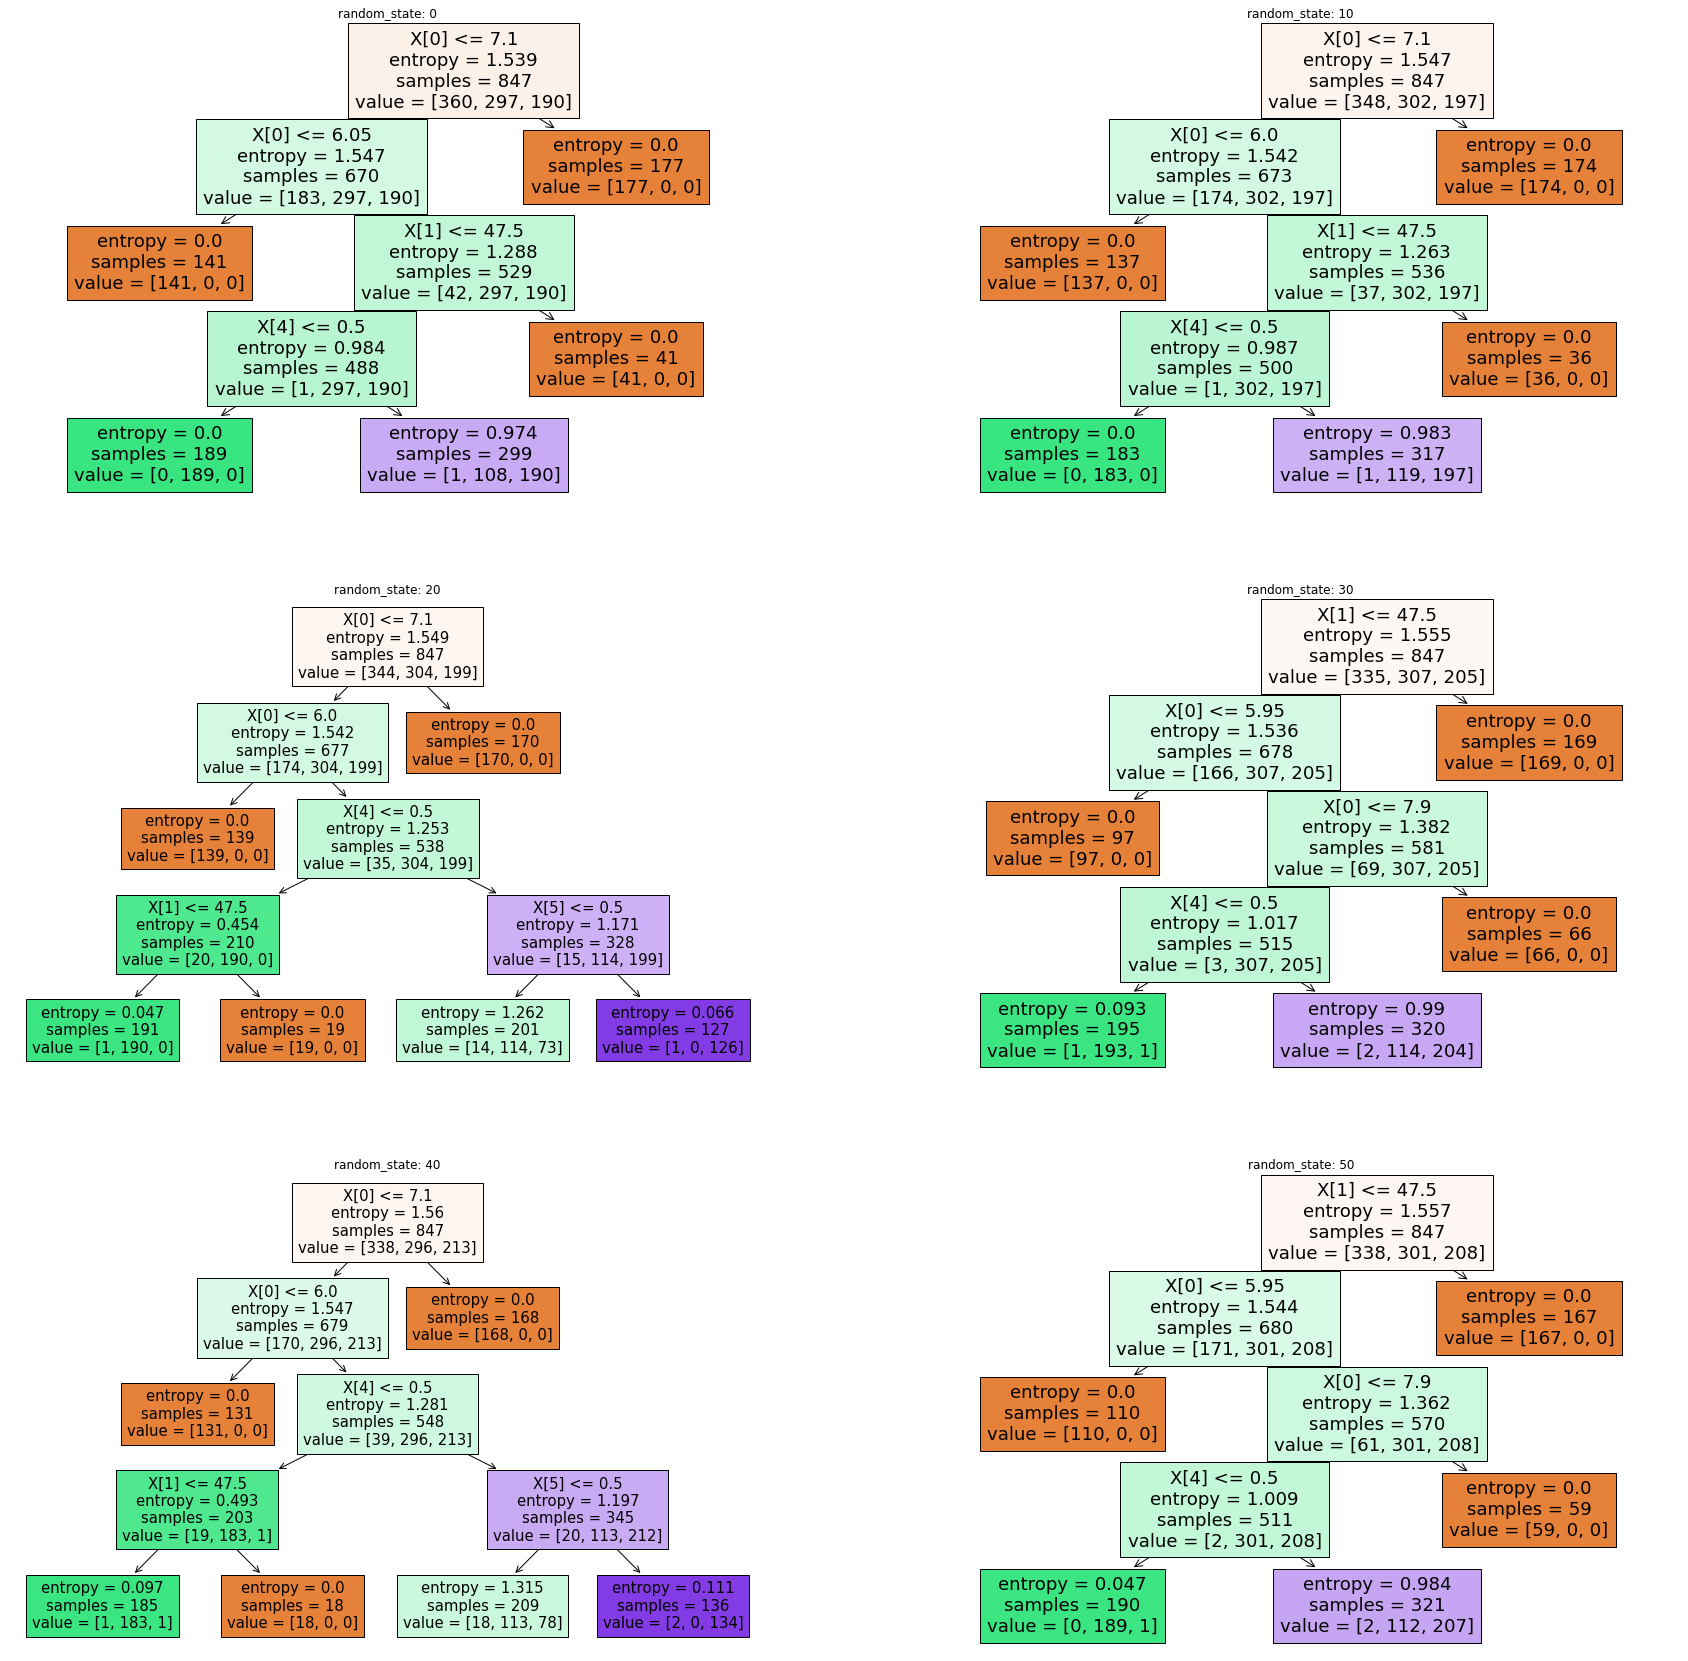

In [8]:
# Графическое представление дерева
figure = plt.figure(figsize=(30, 30))

for i, random_model in enumerate(random_models):
    ax = figure.add_subplot(3, 2, i + 1)

    _ = tree.plot_tree(random_model, filled=True, ax=ax)

    ax.set_title("random_state: " + str(random_samples[i]["random_state"]))

plt.show()

In [9]:
random_sample["X_train"]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
493,4.5,38,0,1,1,1,255
278,9.5,34,1,1,0,1,255
396,6.5,35,1,0,1,0,246
210,6.7,45,1,1,1,0,245
150,9.5,34,1,1,0,1,255
...,...,...,...,...,...,...,...
1056,3.0,40,1,1,1,1,255
229,4.5,38,0,1,1,1,255
70,9.0,43,1,0,1,1,250
132,6.5,35,1,0,1,0,246


In [10]:
random_sample_models = []
for i, random_sample in enumerate(random_samples):

    X_train = random_sample["X_train"]
    Y_train = random_sample["Y_train"]

    X_test = random_sample["X_test"]
    Y_test = random_sample["Y_test"]

    random_state = random_sample["random_state"]

    # Зависимость результата от глубины дерева
    models = []
    for depth in range(1, 11):
        model = DecisionTreeClassifier(
            criterion="entropy", max_depth=depth, random_state=0
        )
        model.fit(X_train, Y_train)
        models.append(model)

    random_sample_models.append(models)

In [11]:
for j, sample_models in enumerate(random_sample_models):
    print("=" * 10)
    print(
        "-" * 10
        + "\n"
        + "random_state: "
        + str(random_samples[j]["random_state"])
        + "\n"
        + "-" * 10
        + "\n"
    )
    for i, model in enumerate(sample_models):
        X_test = random_samples[j]["X_test"]
        X_train = random_samples[j]["X_train"]

        Y_test = random_samples[j]["Y_test"]
        Y_train = random_samples[j]["Y_train"]

        # Accuracy — доля правильных ответов алгоритма

        print("Глубина дерева: ", i + 1)
        print("Train: ", model.score(X_train, Y_train))
        print("Test : ", model.score(X_test, Y_test))
        print(classification_report(Y_test, model.predict(X_test)))

----------
random_state: 0
----------

Глубина дерева:  1
Train:  0.5596221959858324
Test :  0.5188679245283019
              precision    recall  f1-score   support

           1       1.00      0.48      0.65        69
           2       0.43      1.00      0.60        77
           3       0.00      0.00      0.00        66

    accuracy                           0.52       212
   macro avg       0.48      0.49      0.42       212
weighted avg       0.48      0.52      0.43       212

Глубина дерева:  2
Train:  0.7260920897284534
Test :  0.6509433962264151
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        69
           2       0.51      1.00      0.68        77
           3       0.00      0.00      0.00        66

    accuracy                           0.65       212
   macro avg       0.50      0.63      0.54       212
weighted avg       0.51      0.65      0.55       212

Глубина дерева:  3
Train:  0.7744982290436836
Test : 

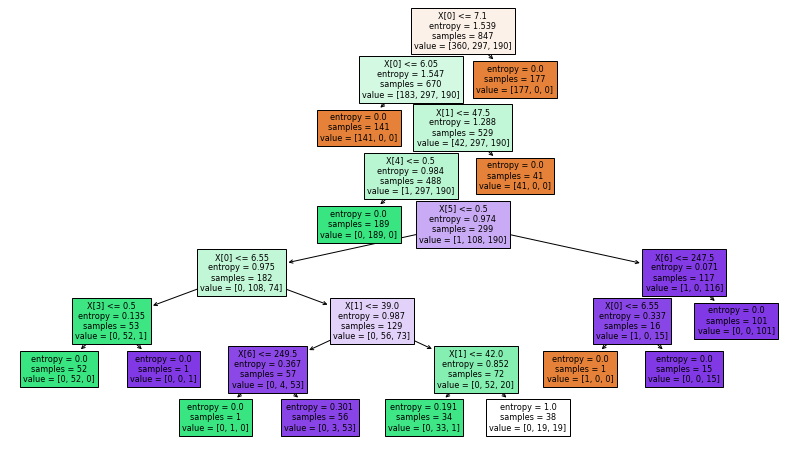

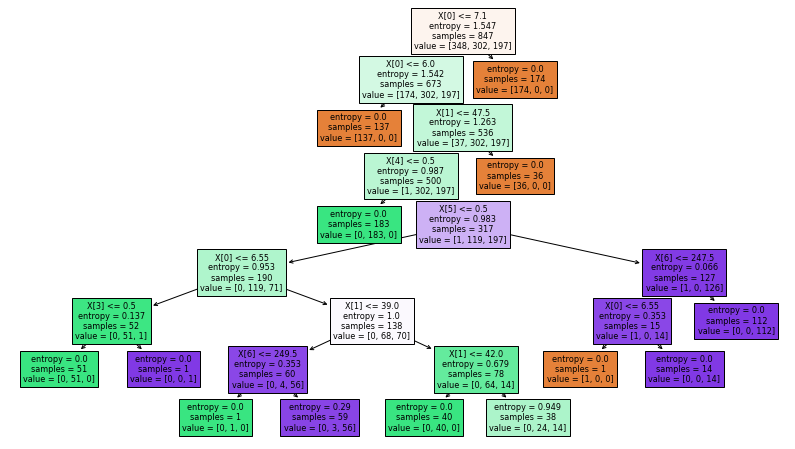

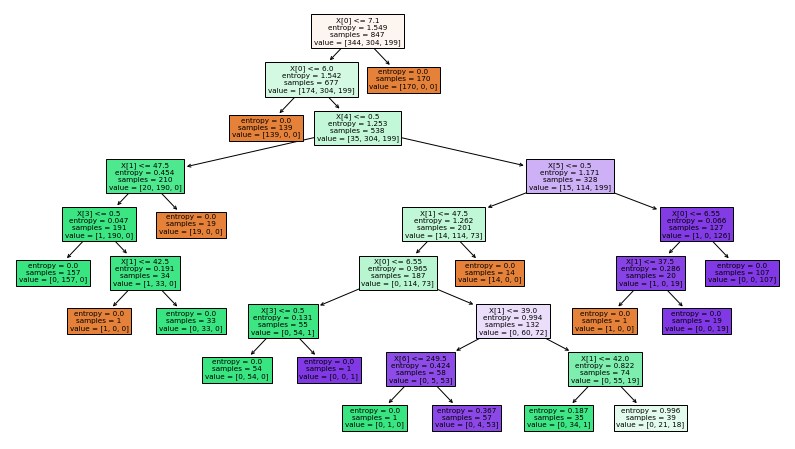

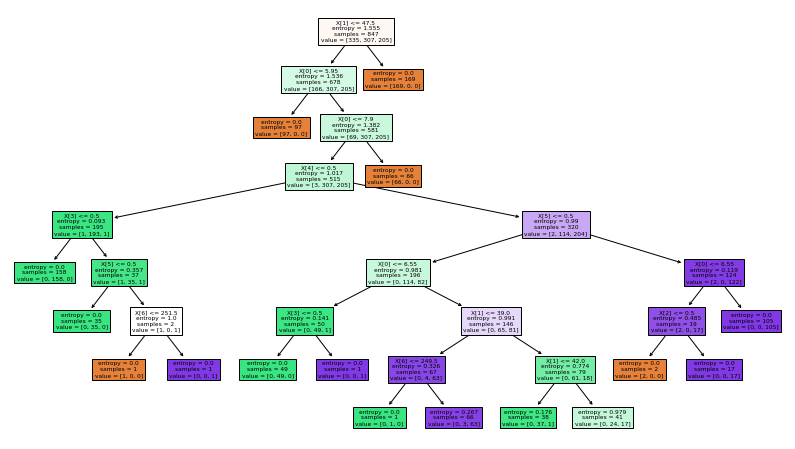

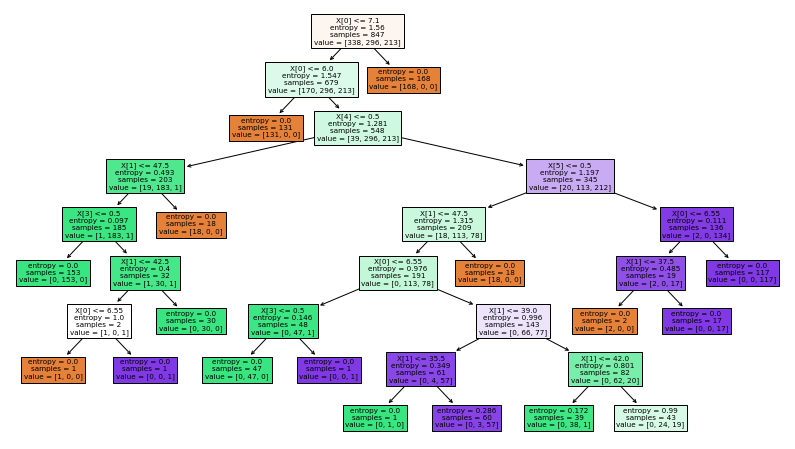

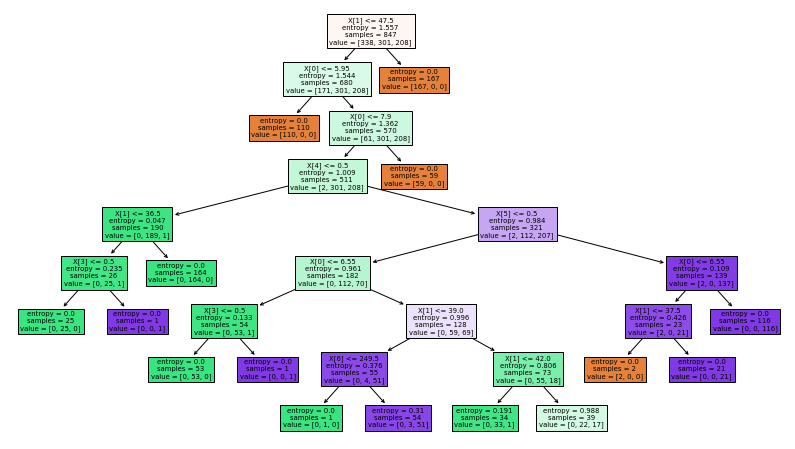

In [12]:
for models in random_sample_models:
    fig = plt.figure(figsize=(14, 8))
    _ = tree.plot_tree(models[7], filled=True)

Проанализировав результат, можно сказать, что на глубине дерева 8 получается стабильный результат. При дальнейшем увеличении глубины дерева, результат практически не улучшается

## Алгоритм "Случайный лес" (RandomForest)

1. Количество деревьев (n_estimators) нужно подбирать, т.к. большое их количество увеличивает качество на обучении, но на контроле, может быть меньше или не меняться вовсе, при этом время обучении возрастает.
2. Важным параметров является количество признаков (max_features), которые участвуют в построении правила разделения. Обычно для классификации используется $\sqrt{n}$, где n – общее количество признаков. Параметр является важным, т.к. при его увеличении деревья становятся похожими друг на друга.
3. Параметр глубина деревьев (max_depth) можно не подбирать, т.к. деревья сами настраивают его. Но если выборка слишком шумная, рекомендуется не использовать слишком глубокие деревья.

In [13]:
# Применение алгоритма классификации

for random_sample in random_samples:

    X_train = random_sample["X_train"]
    Y_train = random_sample["Y_train"]

    X_test = random_sample["X_test"]
    Y_test = random_sample["Y_test"]

    random_state = random_sample["random_state"]
    # Критерии информативности: энтропийный (entropy) и Джини (gini)
    model = RandomForestClassifier(
        criterion="entropy",
        n_estimators=3,
        max_features=2,
        random_state=30,
    )
    model.fit(X_train, Y_train)

    print("=" * 10)
    print("-" * 10 + "random_state: " + str(random_state) + "-" * 10)
    # Accuracy — доля правильных ответов алгоритма
    print("Train: ", model.score(X_train, Y_train))
    print("Test : ", model.score(X_test, Y_test))
    print(classification_report(Y_test, model.predict(X_test)))

----------random_state: 0----------
Train:  1.0
Test :  0.9905660377358491
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        69
           2       0.97      1.00      0.99        77
           3       1.00      0.98      0.99        66

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212

----------random_state: 10----------
Train:  0.9988193624557261
Test :  0.9905660377358491
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        81
           2       0.97      1.00      0.99        72
           3       1.00      0.98      0.99        59

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212

----------random_state: 20----------
Train:  1.0
Test :  1.0
           

In [14]:
results = []

for random_sample in random_samples:
    X_train = random_sample["X_train"]
    Y_train = random_sample["Y_train"]

    X_test = random_sample["X_test"]
    Y_test = random_sample["Y_test"]

    # Зависимость результата от количества деревьев

    models = []
    scores_train = []
    scores_test = []
    n_estimators = list(range(1, 10))

    for estimators in n_estimators:
        model = RandomForestClassifier(
            criterion="entropy", n_estimators=estimators, random_state=0
        )
        model.fit(X_train, Y_train)
        models.append(model)
        scores_test.append(model.score(X_test, Y_test))
        scores_train.append(model.score(X_train, Y_train))

    results.append(
        {
            "models": models,
            "scores_train": scores_train,
            "scores_test": scores_test,
            "n_estimators": n_estimators,
        }
    )

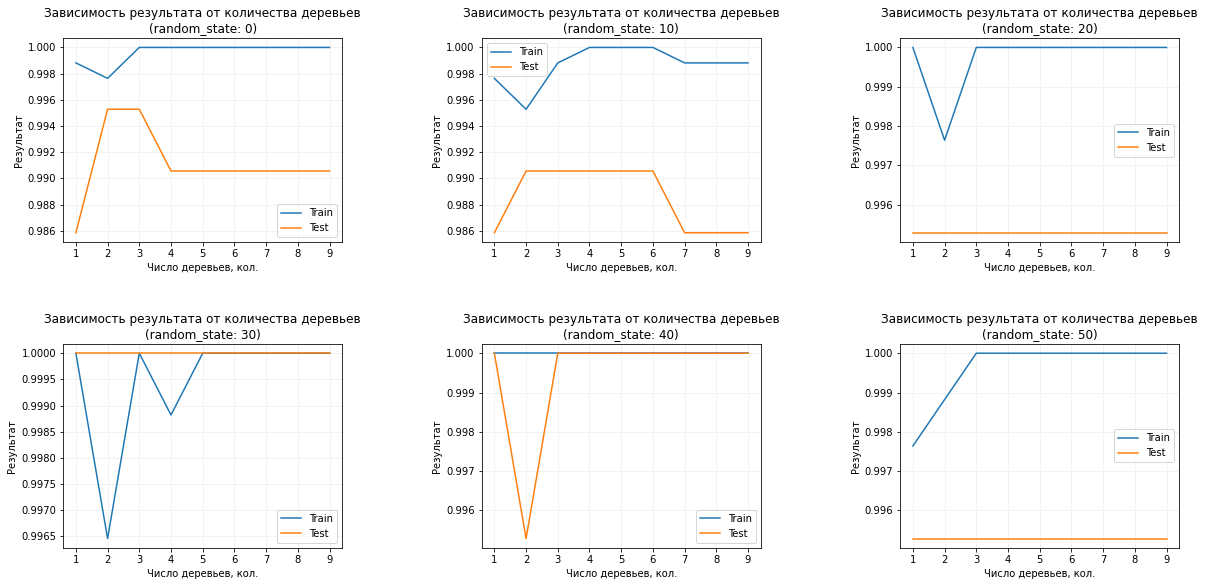

In [15]:
figure = plt.figure(figsize=(20, 15))

for i, result in enumerate(results):
    models = result["models"]
    scores_train = result["scores_train"]
    scores_test = result["scores_test"]
    n_estimators = result["n_estimators"]

    random_state = random_samples[i]["random_state"]

    ax = figure.add_subplot(int(len(results) / 2), int(len(results) / 2), i + 1)

    ax.set_title(
        "Зависимость результата от количества деревьев"
        + "\n"
        + "(random_state: "
        + str(random_state)
        + ")"
    )

    ax.set_xlabel("Число деревьев, кол.")
    ax.set_ylabel("Результат")

    ax.grid(color="0.95", linewidth=1)

    ax.plot(n_estimators, scores_train, label="Train")
    ax.plot(n_estimators, scores_test, label="Test")

    ax.legend(loc="best")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [16]:
# Зависимость качества от числа признаков при расщеплении

results = []

for random_sample in random_samples:
    X_train = random_sample["X_train"]
    Y_train = random_sample["Y_train"]

    X_test = random_sample["X_test"]
    Y_test = random_sample["Y_test"]

    models = []
    scores_train = []
    scores_test = []
    max_features = list(range(1, 10))

    for features in max_features:
        model = RandomForestClassifier(
            criterion="entropy", n_estimators=3, max_features=features, random_state=0
        )
        model.fit(X_train, Y_train)
        models.append(model)
        scores_test.append(model.score(X_test, Y_test))
        scores_train.append(model.score(X_train, Y_train))

    results.append(
        {
            "models": models,
            "scores_train": scores_train,
            "scores_test": scores_test,
            "max_features": max_features,
        }
    )

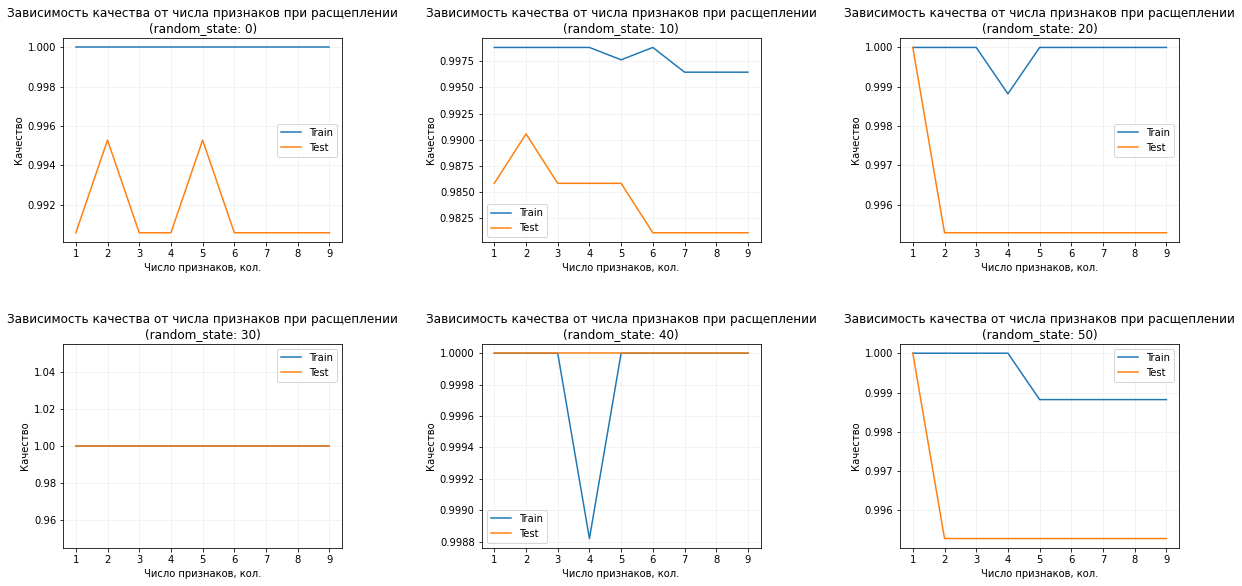

In [17]:
figure = plt.figure(figsize=(20, 15))

for i, result in enumerate(results):
    models = result["models"]
    scores_train = result["scores_train"]
    scores_test = result["scores_test"]
    n_estimators = result["max_features"]

    random_state = random_samples[i]["random_state"]

    ax = figure.add_subplot(int(len(results) / 2), int(len(results) / 2), i + 1)

    ax.set_title(
        "Зависимость качества от числа признаков при расщеплении"
        + "\n"
        + "(random_state: "
        + str(random_state)
        + ")"
    )

    ax.set_xlabel("Число признаков, кол.")
    ax.set_ylabel("Качество")

    ax.grid(color="0.95", linewidth=1)

    ax.plot(max_features, scores_train, label="Train")
    ax.plot(max_features, scores_test, label="Test")

    ax.legend(loc="best")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [18]:
# Зависимость результата от глубины деревьев

results = []

for random_sample in random_samples:
    X_train = random_sample["X_train"]
    Y_train = random_sample["Y_train"]

    X_test = random_sample["X_test"]
    Y_test = random_sample["Y_test"]

    models = []
    scores_train = []
    scores_test = []
    current_depth = []

    max_depth = list(range(1, 20))

    for depth in max_depth:
        model = RandomForestClassifier(
            criterion="entropy", n_estimators=3, max_depth=depth, random_state=0
        )
        model.fit(X_train, Y_train)
        models.append(model)
        scores_test.append(model.score(X_test, Y_test))
        scores_train.append(model.score(X_train, Y_train))
        current_depth.append(model.estimators_[0].get_depth() / depth)

    results.append(
        {
            "models": models,
            "scores_train": scores_train,
            "scores_test": scores_test,
            "current_depth": current_depth,
            "max_depth": max_depth,
        }
    )

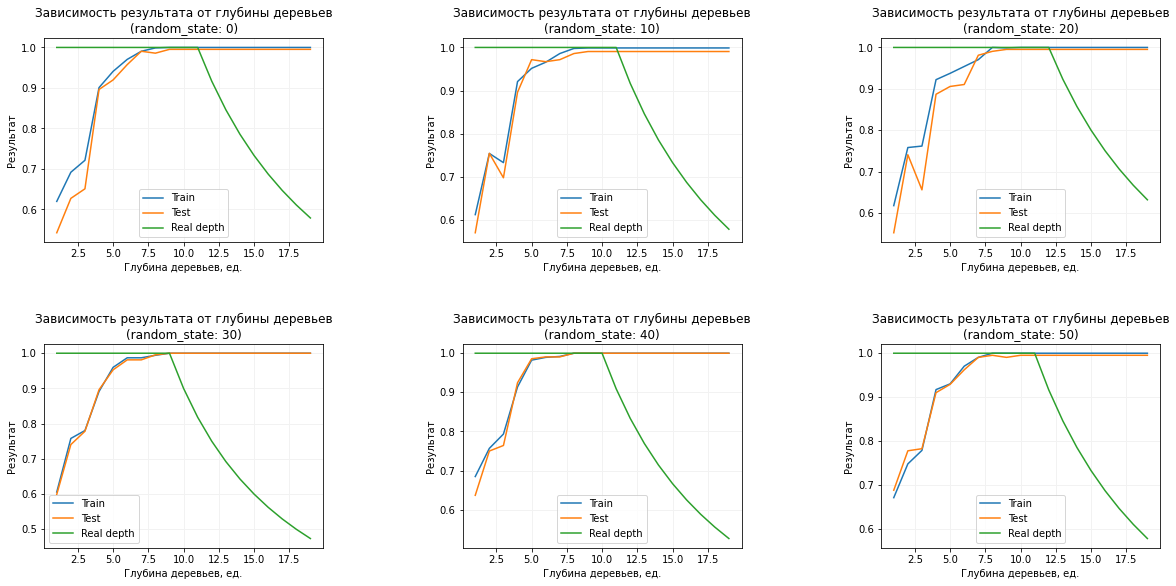

In [19]:
figure = plt.figure(figsize=(20, 15))

for i, result in enumerate(results):
    models = result["models"]
    scores_train = result["scores_train"]
    scores_test = result["scores_test"]
    current_depth = result["current_depth"]
    max_depth = result["max_depth"]

    random_state = random_samples[i]["random_state"]

    ax = figure.add_subplot(int(len(results) / 2), int(len(results) / 2), i + 1)

    ax.set_title(
        "Зависимость результата от глубины деревьев"
        + "\n"
        + "(random_state: "
        + str(random_state)
        + ")"
    )

    ax.set_xlabel("Глубина деревьев, ед.")
    ax.set_ylabel("Результат")

    ax.grid(color="0.95", linewidth=1)

    ax.plot(max_depth, scores_train, label="Train")
    ax.plot(max_depth, scores_test, label="Test")
    ax.plot(max_depth, current_depth, label="Real depth")

    ax.legend(loc="best")

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Real depth на графике говорит о том, когда глубина дерева достигает своего возможно предела. То есть глубина 11 - это максимальная возможная глубина деревьев, дальнейшее увеличение глубины не имеет никакого смысла из-за невозможности построения деревьев большей глубины.

---


# Заключение

## 1. Алгорим "Решающее дерево" (DecisionTree)

* Критерий информативности: criterion='entropy'
* Глубина дерева: max_depth=8
* Качество на обучающей выборке: ≈0.97
* Качество на контрольной выборке: ≈0.96


## 2. Алгоритм "Случайный лес" (RandomForest)

* Количество деревьев: n_estimators=3
* Признаки для разделения: max_features=2
* Качество на обучающей выборке: ≈0.99
* Качество на контрольной выборке: ≈0.99

## 3. Вывод

На обоих алгоритмах видно, что random state влияет на количество вхождений объектов разных классов (это видно из параметра _support_ при выводе _classification_report_). Это напрямую влияет на ветвистость деревьев (на то, как выбираются правила, по которым строятся деревья).

Лучший результат продемонстрировал алгоритм RandomForest. 
Разница на обучении на 2%, а на тесте на 3%. Это не так много, но всё же разница в качестве есть. Это связана именно с тем, что у нас не одно дерево, как в DecisionTree, а множество.